# BMI analysis

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', palette='vlag')
import pandas as pd
import numpy as np
import shutil
import itertools

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"
plot_manuscript = "../manuscript/plots/"

def product_dict(**kwargs):
    keys = kwargs.keys()
    vals = kwargs.values()
    for instance in itertools.product(*vals):
        yield dict(zip(keys, instance))

In [75]:
print(sns.__version__)

0.12.0.dev0


# Define parameters

In [76]:
# scenarios genes + vertical transmission
replicates = 100
d = {'random-mating' :  [0.10, .25, 0.5, 0.75, 0.90],
    'genes' : [0.0, 0.05, 0.10, 0.20],
    'vertical-trans' : [0.0, 0.05, 0.10, 0.20]}

df = pd.DataFrame(product_dict(**d))
df['iteration'] = df.groupby(list(d)).ngroup()
df = df.loc[df.index.repeat(replicates)]
vars = ['iteration', 'random-mating', 'genes', 'vertical-trans']
df.loc[:,vars].to_csv(model_path + "data/param-bmi-mating-genes-vertical-trans-test.csv", index=False)
df.loc[:,vars].shape

(8000, 4)

# Genes + Vertical transmission + Mating

In [77]:
vars = ['iteration', 'p_genetic_variance', 'p_vertical_trans_variance', 
    'p_random_mating', 'p_fertility_factor']
df = pd.read_csv(output_path + "results-bmi-mating-genes-vertical-trans-test.csv", sep = ";")
params = pd.read_csv(output_path + "param-bmi-mating-genes-vertical-trans-test.csv", sep = ";")
params = params. drop_duplicates(subset=vars)

cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
df = df.merge(params, on = ["iteration"])
df['p_comb'] = 'G = ' + df['p_genetic_variance'].map(str)  + ', VT = ' + df['p_vertical_trans_variance'].map(str)

/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_51353/1305005866.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [78]:
df.loc[df.p_genetic_variance==0.05].groupby(['p_comb', 'p_random_mating'])['g4'].describe(percentiles=[0.5, 0.025, 0.975])

count      mean       std       min  \
p_comb              p_random_mating                                        
G = 0.05, VT = 0.0  0.10             100.0  0.103246  0.005057  0.090558   
                    0.25             100.0  0.103129  0.004511  0.094547   
                    0.50             100.0  0.100869  0.004833  0.091645   
                    0.75             100.0  0.097298  0.004392  0.089272   
                    0.90             100.0  0.093251  0.003956  0.084539   
G = 0.05, VT = 0.05 0.10             100.0  0.147396  0.008406  0.126493   
                    0.25             100.0  0.141141  0.007644  0.115420   
                    0.50             100.0  0.130446  0.008279  0.109643   
                    0.75             100.0  0.118181  0.007003  0.099313   
                    0.90             100.0  0.108302  0.007220  0.092224   
G = 0.05, VT = 0.1  0.10             100.0  0.191383  0.011859  0.163719   
                    0.25             100.0  0.183595  0.011883  0.158361   
                    0.50             100.0  0.161750  0.008494  0.140358   
                    0.75             100.0  0.137341  0.009458  0.113145   
                    0.90             100.0  0.121992  0.007666  0.105027   
G = 0.05, VT = 0.2  0.10             100.0  0.339810  0.020498  0.289022   
                    0.25             100.0  0.309882  0.020003  0.266626   
                    0.50             100.0  0.258311  0.015828  0.212894   
                    0.75             100.0  0.199341  0.014348  0.169004   
                    0.90             100.0  0.161830  0.014013  0.133536   

                                         2.5%       50%     97.5%       max  
p_comb              p_random_mating                                          
G = 0.05, VT = 0.0  0.10             0.093942  0.103727  0.111801  0.112969  
                    0.25             0.095901  0.102894  0.113321  0.113901  
                    0.50             0.092743  0.100696  0.112446  0.117057  
                    0.75             0.090245  0.096781  0.107921  0.110599  
                    0.90             0.085630  0.093468  0.101063  0.103115  
G = 0.05, VT = 0.05 0.10             0.132570  0.147277  0.162402  0.169590  
                    0.25             0.128255  0.140863  0.155444  0.160793  
                    0.50             0.114407  0.130699  0.146964  0.154921  
                    0.75             0.107094  0.118177  0.131036  0.135380  
                    0.90             0.096542  0.108938  0.121181  0.129133  
G = 0.05, VT = 0.1  0.10             0.169450  0.191912  0.215914  0.223450  
                    0.25             0.161039  0.183426  0.207964  0.210318  
                    0.50             0.146062  0.161664  0.178617  0.184037  
                    0.75             0.120515  0.136991  0.155772  0.161412  
                    0.90             0.109091  0.121710  0.137637  0.141337  
G = 0.05, VT = 0.2  0.10             0.297150  0.339943  0.382038  0.386353  
                    0.25             0.271876  0.307872  0.340412  0.377484  
                    0.50             0.227877  0.259965  0.292282  0.302171  
                    0.75             0.172385  0.198343  0.226857  0.235998  
                    0.90             0.141590  0.160105  0.191971  0.201810

[0.1, 0.0, 0.2, 0.05]


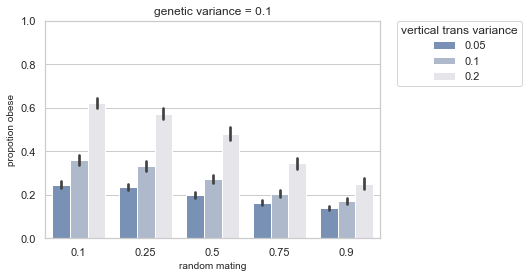

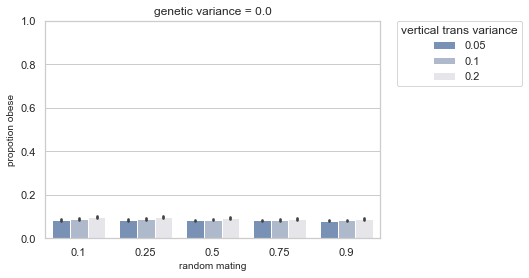

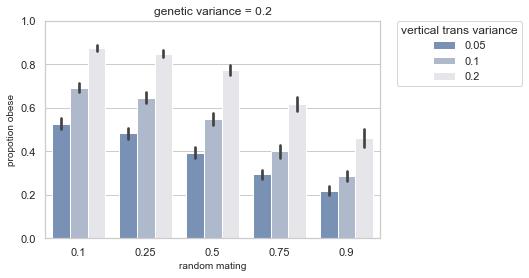

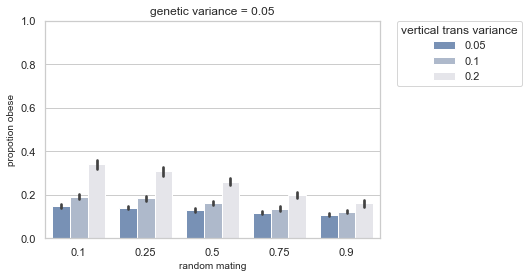

In [79]:
s = df.loc[df.p_vertical_trans_variance != 0].copy()
v = list(s.p_genetic_variance.unique())
print(v)
for i in v:
    p = sns.barplot(y='g4', x='p_random_mating', hue='p_vertical_trans_variance',
    data=s[s.p_genetic_variance==i], estimator=np.median, ci='sd');
    p.set_ylabel("propotion obese", fontsize = 10)
    p.set_xlabel("random mating", fontsize = 10)
    p.set(title ="genetic variance = " + str(i))
    p.set_ylim(0, 1.0)
    plt.legend(title='vertical trans variance', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(plots_path + "prop-bmi-mating-vertical-trans-genes-test-" + str(i).replace('.', '-') + ".pdf", bbox_inches='tight')
    shutil.copy(plots_path + "prop-bmi-mating-vertical-trans-genes-test-" + str(i).replace('.', '-') + ".pdf", plot_manuscript)
    plt.show()

In [80]:
# vertical transmission = 0
s = df.loc[(df.p_vertical_trans_variance == 0) & (df.p_genetic_variance>0)].copy()
p = sns.barplot(y='g4', x='p_random_mating', hue='p_genetic_variance',
data=s, estimator=np.median);
p.set_ylabel("propotion obese", fontsize = 10)
p.set_xlabel("random mating", fontsize = 10)
p.set(title ="vertical transmission = " + str(0))
p.set_ylim(0, 1.0)
plt.legend(title='genetic variance', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plots_path + "prop-bmi-mating-genes-vertical-trans-test-" + str(0) + ".pdf", bbox_inches='tight')
shutil.copy(plots_path + "prop-bmi-mating-genes-vertical-trans-test-" + str(0) + ".pdf", plot_manuscript)
plt.show()

KeyboardInterrupt: 

# Genes + Vertical transmission + Fertiliy

In [ ]:
# scenarios genes + vertical transmission
replicates = 100
d = {'fertility' :  [0.0, .10, 0.20, 0.30],
    'genes' : [0.0, 0.05, 0.10, 0.20],
    'vertical-trans' : [0.0, 0.05, 0.10, 0.20]}

df = pd.DataFrame(product_dict(**d))
df['iteration'] = df.groupby(list(d)).ngroup()
df = df.loc[df.index.repeat(replicates)]
vars = ['iteration', 'fertility', 'genes', 'vertical-trans']
df.loc[:,vars].to_csv(model_path + "data/param-bmi-fertility-genes-vertical-trans-test.csv", index=False)
df.loc[:,vars].shape

(6400, 4)

In [ ]:
vars = ['iteration', 'p_genetic_variance', 'p_vertical_trans_variance', 
    'p_random_mating', 'p_fertility_factor']
df = pd.read_csv(output_path + "results-bmi-fertility-genes-vertical-trans-test.csv", sep = ";")
params = pd.read_csv(output_path + "param-bmi-fertility-genes-vertical-trans-test.csv", sep = ";")
params = params. drop_duplicates(subset=vars)

cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
df = df.merge(params, on = ["iteration"])
df['p_comb'] = 'G = ' + df['p_genetic_variance'].map(str)  + ', VT = ' + df['p_vertical_trans_variance'].map(str)

/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_51353/4115404729.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [ ]:
df.shape

(6400, 28)

In [ ]:
df.loc[(df.p_fertility_factor==0) & (df.p_vertical_trans_variance==0)].groupby(['p_comb', 'p_fertility_factor'])['g4'].describe(percentiles=[0.5, 0.025, 0.975])

,,count,mean,std,min,2.5%,50%,97.5%,max
p_comb,p_fertility_factor,,,,,,,,
"G = 0.0, VT = 0.0",0.0,100.0,0.080631,0.002004,0.076214,0.077041,0.080397,0.084911,0.086017
"G = 0.05, VT = 0.0",0.0,100.0,0.082751,0.004439,0.073879,0.075004,0.082607,0.091567,0.092898
"G = 0.1, VT = 0.0",0.0,100.0,0.083174,0.004721,0.072345,0.074530,0.083196,0.092041,0.095012
"G = 0.2, VT = 0.0",0.0,100.0,0.087797,0.007573,0.067969,0.073500,0.086711,0.102867,0.107465


[0.1, 0.0, 0.2, 0.05]


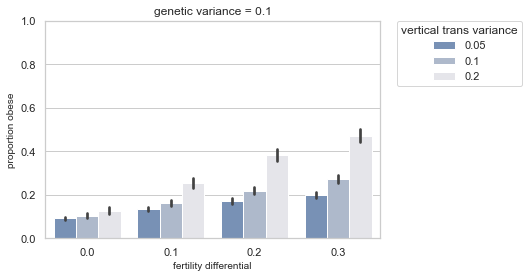

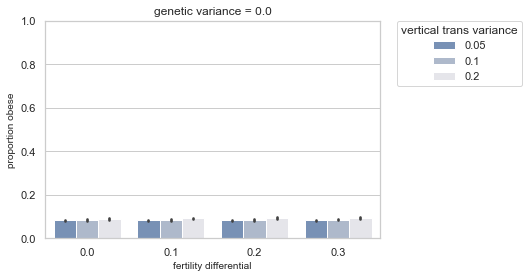

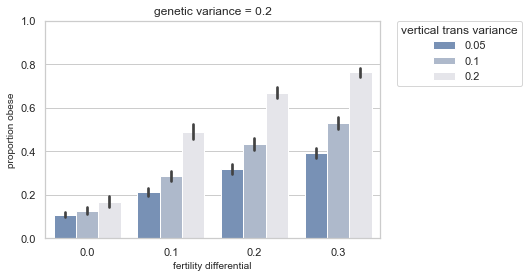

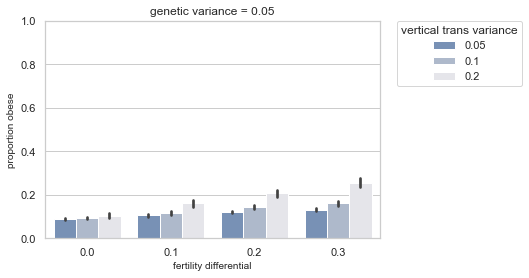

In [ ]:
s = df.loc[df.p_vertical_trans_variance != 0].copy()
v = list(s.p_genetic_variance.unique())
print(v)
for i in v:
    p = sns.barplot(y='g4', x='p_fertility_factor', hue='p_vertical_trans_variance',
    data=s[s.p_genetic_variance==i], estimator=np.median, ci='sd');
    p.set_ylabel("proportion obese", fontsize = 10)
    p.set_xlabel("fertility differential", fontsize = 10)
    p.set(title ="genetic variance = " + str(i))
    p.set_ylim(0, 1.0)
    plt.legend(title='vertical trans variance', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(plots_path + "prop-bmi-fertility-vertical-trans-genes-test-" + str(i).replace('.', '-') + ".pdf", bbox_inches='tight')
    shutil.copy(plots_path + "prop-bmi-fertility-vertical-trans-genes-test-" + str(i).replace('.', '-') + ".pdf", plot_manuscript)
    plt.show()

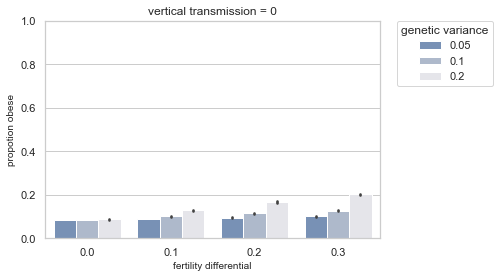

In [ ]:
# vertical transmission = 0
s = df.loc[(df.p_vertical_trans_variance==0) & (df.p_genetic_variance>0)].copy()
p = sns.barplot(y='g4', x='p_fertility_factor', hue='p_genetic_variance',
data=s, estimator=np.median);
p.set_ylabel("propotion obese", fontsize = 10)
p.set_xlabel("fertility differential", fontsize = 10)
p.set(title ="vertical transmission = " + str(0))
p.set_ylim(0, 1.0)
plt.legend(title='genetic variance', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plots_path + "prop-bmi-fertility-genes-vertical-trans-test-" + str(0) + ".pdf", bbox_inches='tight')
shutil.copy(plots_path + "prop-bmi-fertility-genes-vertical-trans-test-" + str(0) + ".pdf", plot_manuscript)
plt.show()

# No mating and fertlity differentials

In [ ]:
replicates = 100
d = {'random-mating' :  [1.0],
    'fertility': [0.0],
    'genes' : [0.0, 0.05, 0.10, 0.20],
    'vertical-trans' : [0.0, 0.05, 0.10, 0.20]}

df = pd.DataFrame(product_dict(**d))
df['iteration'] = df.groupby(list(d)).ngroup()
df = df.loc[df.index.repeat(replicates)]
vars = ['iteration', 'random-mating', 'fertility', 'genes', 'vertical-trans']
df.loc[:,vars].to_csv(model_path + "data/param-bmi-only-genes-vertical-trans-test.csv", index=False)
df.loc[:,vars].shape

(1600, 5)

In [ ]:
df.describe()

,random-mating,fertility,genes,vertical-trans,iteration
count,1600.0,1600.0,1600.000000,1600.000000,1600.000000
mean,1.0,0.0,0.087500,0.087500,7.500000
std,0.0,0.0,0.073974,0.073974,4.611213
min,1.0,0.0,0.000000,0.000000,0.000000
25%,1.0,0.0,0.037500,0.037500,3.750000
50%,1.0,0.0,0.075000,0.075000,7.500000
75%,1.0,0.0,0.125000,0.125000,11.250000
max,1.0,0.0,0.200000,0.200000,15.000000


In [ ]:
vars = ['iteration', 'p_genetic_variance', 'p_vertical_trans_variance', 
    'p_random_mating', 'p_fertility_factor']
df = pd.read_csv(output_path + "results-bmi-only-genes-vertical-trans-test.csv", sep = ";")
params = pd.read_csv(output_path + "param-bmi-only-genes-vertical-trans-test.csv", sep = ";")
params = params. drop_duplicates(subset=vars)

cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
df = df.merge(params, on = ["iteration"])
df['p_comb'] = 'G = ' + df['p_genetic_variance'].map(str)  + ', VT = ' + df['p_vertical_trans_variance'].map(str)

/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_51353/1973531835.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [ ]:
df.p_random_mating.value_counts()

1.0    1600
Name: p_random_mating, dtype: int64

In [ ]:
df.p_fertility_factor.value_counts()

0.0    1600
Name: p_fertility_factor, dtype: int64

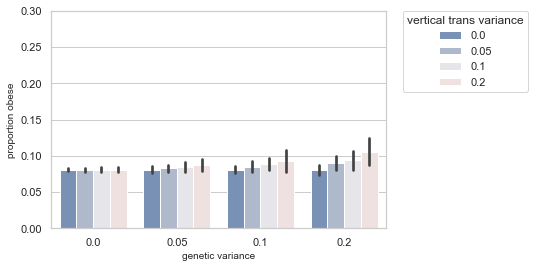

In [ ]:
s = df.copy()
p = sns.barplot(y='g4', x='p_genetic_variance', hue='p_vertical_trans_variance', data=s, ci='sd')
p.set_ylabel("proportion obese", fontsize = 10)
p.set_xlabel("genetic variance", fontsize = 10)
p.set_ylim(0, 0.3)
plt.legend(title='vertical trans variance', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plots_path + "prop-bmi-only-vertical-trans-genes-test.pdf", bbox_inches='tight')
shutil.copy(plots_path + "prop-bmi-only-vertical-trans-genes-test.pdf", plot_manuscript)
plt.show()